In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
train = pd.read_csv('/content/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test.csv')

In [ ]:
xtrain = train
ytrain = train['label']
xtest = test
ytest = test['label']

In [ ]:
xtrain.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [ ]:
xtrain = xtrain.drop(['label'],axis=1)
xtest = xtest.drop(['label'],axis=1)

In [ ]:
xtrain.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155,157,156,156,156,157,156,158,158,157,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187,188,188,187,187,186,187,188,187,186,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211,211,212,212,211,210,211,210,210,211,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164,167,170,172,176,179,180,184,185,186,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
ytrain.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [ ]:
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp.fit(xtrain)
xtrain = imp.transform(xtrain)
xtest = imp.transform(xtest)





In [ ]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)

In [ ]:
np.isnan(xtrain).sum()

0

In [ ]:
x_train_rs = np.reshape(xtrain,(xtrain.shape[0],28,28,1))
x_test_rs = np.reshape(xtest,(xtest.shape[0],28,28,1))

In [ ]:
x_train_rs.shape

(12441, 28, 28, 1)

In [ ]:
#x_train_rs = x_train_rs/255
#x_test_rs = x_test_rs/255

In [ ]:
x_train_rs[0]

array([[[107.],
        [118.],
        [127.],
        [134.],
        [139.],
        [143.],
        [146.],
        [150.],
        [153.],
        [156.],
        [158.],
        [160.],
        [163.],
        [165.],
        [159.],
        [166.],
        [168.],
        [170.],
        [170.],
        [171.],
        [171.],
        [171.],
        [172.],
        [171.],
        [171.],
        [170.],
        [170.],
        [169.]],

       [[111.],
        [121.],
        [129.],
        [135.],
        [141.],
        [144.],
        [148.],
        [151.],
        [154.],
        [157.],
        [160.],
        [163.],
        [164.],
        [170.],
        [119.],
        [152.],
        [171.],
        [171.],
        [170.],
        [171.],
        [172.],
        [172.],
        [172.],
        [172.],
        [172.],
        [171.],
        [171.],
        [170.]],

       [[113.],
        [123.],
        [131.],
        [137.],
        [142.],
        [145.],
    

In [ ]:
x_train_rs[0].shape

(28, 28, 1)

In [ ]:
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))


model.add(Flatten())

model.add(Dense(100,activation='relu'))

model.add(Dense(25,activation='softmax'))



In [ ]:

model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_train_rs = x_train_rs.astype('float32')
x_test_rs = x_test_rs.astype('float32')

In [ ]:
history = model.fit(x_train_rs,ytrain,epochs=100,validation_data=(x_test_rs,ytest))


Epoch 1/100
389/389 [==============================] - 64s 7ms/step - loss: 0.2994 - accuracy: 0.9173 - val_loss: 0.5060 - val_accuracy: 0.8747
Epoch 2/100
389/389 [==============================] - 3s 7ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2444 - val_accuracy: 0.9381
Epoch 3/100
389/389 [==============================] - 2s 6ms/step - loss: 9.8772e-04 - accuracy: 1.0000 - val_loss: 0.2487 - val_accuracy: 0.9346
Epoch 4/100
389/389 [==============================] - 2s 5ms/step - loss: 5.4769e-04 - accuracy: 1.0000 - val_loss: 0.2458 - val_accuracy: 0.9334
Epoch 5/100
389/389 [==============================] - 2s 5ms/step - loss: 3.3734e-04 - accuracy: 1.0000 - val_loss: 0.2409 - val_accuracy: 0.9349
Epoch 6/100
389/389 [==============================] - 2s 5ms/step - loss: 2.2526e-04 - accuracy: 1.0000 - val_loss: 0.2401 - val_accuracy: 0.9387
Epoch 7/100
389/389 [==============================] - 3s 7ms/step - loss: 1.5398e-04 - accuracy: 1.0000 - val_loss: 0.2497 -

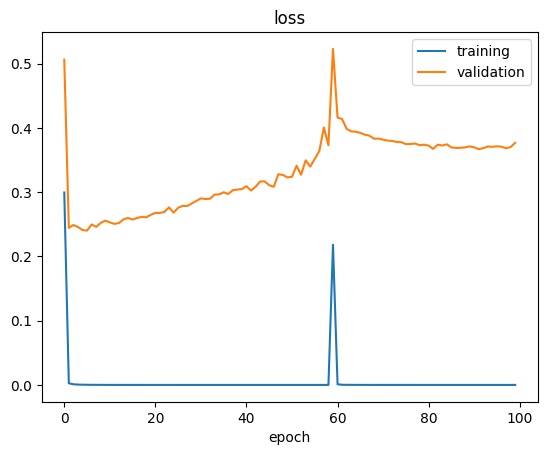

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
weights = model.layers[0].get_weights()

In [ ]:
print(weights)

[array([[[[-0.11761186,  0.01404571, -0.16250892, -0.02875445,
          -0.21841294,  0.00826683, -0.15639706, -0.10651062,
           0.01370596,  0.00828737, -0.17909278, -0.23288521,
           0.01698628, -0.19905874,  0.17289144,  0.06838688,
          -0.14203092, -0.0010811 , -0.02407051,  0.05785351,
          -0.1431572 , -0.01203909,  0.17329744, -0.18332554,
          -0.16681056, -0.03656598, -0.17899911,  0.05024256,
          -0.02999055,  0.11746828, -0.02952321, -0.03473575]],

        [[-0.01727872,  0.01940882, -0.06395147, -0.1484137 ,
          -0.06594834, -0.10829514, -0.13589227, -0.07205308,
           0.00136444, -0.14513642,  0.15516083, -0.12316209,
           0.00573586,  0.13929525,  0.10423608,  0.16261907,
           0.15941755,  0.01731083,  0.131379  ,  0.12824951,
           0.00778447, -0.22603433,  0.08853132, -0.19096749,
           0.17032841, -0.00389079,  0.04099892,  0.03218604,
          -0.15892014, -0.14646679, -0.0772582 ,  0.11260361]],

 

In [ ]:
y_pred = model.predict(x_test_rs)

# To get the predicted classes
predicted_classes = np.argmax(y_pred, axis=1)

print(predicted_classes)

225/225 [==============================] - 0s 2ms/step
[ 6  5 10 ...  2  4  2]


In [ ]:
ytest

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

Text(0.5, 0, '16')

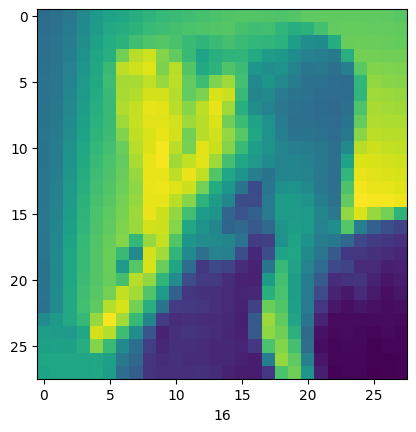

In [ ]:
plt.imshow(x_train_rs[12])
plt.xlabel(ytrain[12])

In [ ]:
data = x_train_rs[12]


In [ ]:
alphabet_dict = {i -1: chr(64 + i) for i in range(1, 26)}
print(alphabet_dict)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}


In [ ]:
y_pred = model.predict(data.reshape(1,28,28,1))
print(y_pred)
print()
print(y_pred.argmax(axis = 1))


for i in range(len(alphabet_dict)):
  if y_pred.argmax(axis = 1) == i:
    print(alphabet_dict[i])


1/1 [==============================] - 0s 25ms/step
[[3.5182692e-22 2.9015225e-14 1.1049273e-18 3.4678025e-18 2.6518759e-19
  1.9101582e-23 1.8047506e-25 1.2425726e-19 6.8867134e-19 2.1875005e-32
  5.1215658e-24 2.6573865e-14 3.2364099e-16 5.9704969e-24 1.5638297e-19
  6.3646124e-16 1.0000000e+00 5.4378256e-21 4.3960339e-20 1.1052007e-19
  4.7632204e-16 2.4913678e-12 1.7316718e-23 1.3478813e-16 3.9998170e-17]]

[16]
Q


In [ ]:
ytrain[10]

18

In [ ]:
alphabet_dict = {i -1: chr(64 + i) for i in range(1, 26)}
print(alphabet_dict)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}


In [ ]:
import joblib

# Assuming `model` is your trained model
joblib.dump(model, 'SignLang_v1.pkl')

['SignLang_v1.pkl']

In [ ]:
# Assuming `model` is your trained Keras model
model.save('SignLang_v1.h5')

# To load the model later
from tensorflow.keras.models import load_model
loaded_model = load_model('SignLang_v1.h5')

In [ ]:
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_1 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                      

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('/content/SignLang_v1.h5')

# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    success, frame = cap.read()
    if not success:
        break

    # Preprocess the frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    normalized = resized / 255.0
    reshaped = normalized.reshape(1, 28, 28, 1)

    # Make predictions
    predictions = model.predict(reshaped)

    # Example: If prediction indicates a hand, display a bounding box
    if predictions[0][0] > 0.5:  # Adjust threshold as needed
        cv2.putText(frame, 'Hand Detected', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Hand Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [ ]:
from tensorflow.keras.models import load_model

# Load your trained model
loaded = load_model('/content/SignLang_v1.h5')
y_pred = loaded.predict(data.reshape(1,28,28,1))
print(y_pred)
print()
print(y_pred.argmax(axis = 1))


for i in range(len(alphabet_dict)):
  if y_pred.argmax(axis = 1) == i:
    print(alphabet_dict[i])


1/1 [==============================] - 0s 85ms/step
[[3.5182692e-22 2.9015225e-14 1.1049273e-18 3.4678025e-18 2.6518759e-19
  1.9101582e-23 1.8047506e-25 1.2425726e-19 6.8867134e-19 2.1875005e-32
  5.1215658e-24 2.6573865e-14 3.2364099e-16 5.9704969e-24 1.5638297e-19
  6.3646124e-16 1.0000000e+00 5.4378256e-21 4.3960339e-20 1.1052007e-19
  4.7632204e-16 2.4913678e-12 1.7316718e-23 1.3478813e-16 3.9998170e-17]]

[16]
Q
